In [6]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", sep=";")

df = df.replace("unknown", None)
df = df.dropna()



In [8]:
features = df[[
    "age",
    "duration",
    "campaign",
    "previous",
    "euribor3m",
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "nr.employed"
]]

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(features)



In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)


In [11]:
profile = df.groupby("Cluster")[features.columns].mean()
print(profile)


               age    duration   campaign  previous  euribor3m  emp.var.rate  \
Cluster                                                                        
0        39.183538  178.605487  13.020814  0.004730   4.880940      1.280322   
1        37.344252  261.345747   2.157928  0.309628   1.301990     -1.841948   
2        38.868287  257.979867   2.193209  0.033902   4.790174      1.067201   
3        44.173653  290.357706   1.829499  0.886858   0.804810     -2.583832   

         cons.price.idx  cons.conf.idx  nr.employed  
Cluster                                              
0             93.917941     -39.839830  5219.402838  
1             93.054374     -45.991767  5088.131785  
2             93.801910     -39.523869  5212.946377  
3             92.977895     -33.413993  5025.704633  


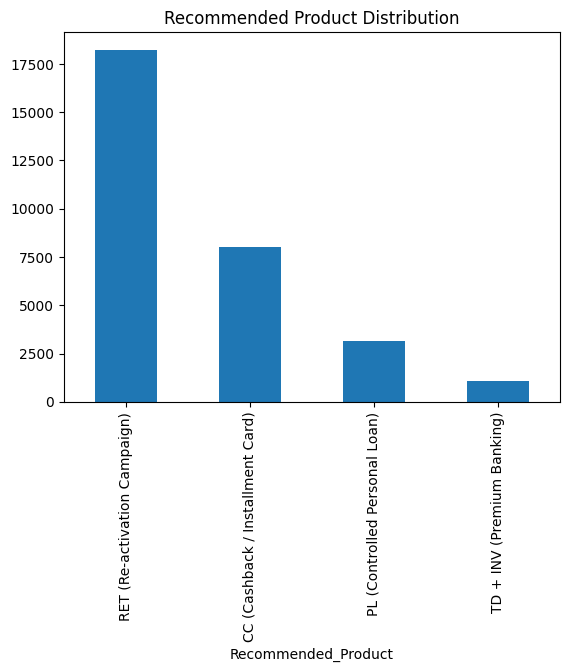

In [13]:
def recommend(row):
    if row["Cluster"] == 0:
        return "TD + INV (Premium Banking)"
    elif row["Cluster"] == 1:
        return "CC (Cashback / Installment Card)"
    elif row["Cluster"] == 2:
        return "RET (Re-activation Campaign)"
    else:
        return "PL (Controlled Personal Loan)"

df["Recommended_Product"] = df.apply(recommend, axis=1)

#Recommendation Distribution

import matplotlib.pyplot as plt
df["Recommended_Product"].value_counts().plot(kind="bar", title="Recommended Product Distribution")
plt.show()